In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [2]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv(r"C:\Users\PC\Downloads\cars.csv")
df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [4]:
df.shape


(6019, 14)

**Clean Dataset**

In [5]:
#check null values
null_values = df.isnull().sum()
print(null_values)

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


In [6]:
#remove null values
df = df.dropna(subset=['Seats'])


In [7]:
df['Brand'] = df['Name'].str.split().str[0]

In [8]:
df.insert(0, 'Brand', df.pop('Brand'))

In [9]:
df['Name'] = df['Name'].str.split(n=1).str[1]

In [10]:
print(df.isnull().sum())

Brand                   0
Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                   0
Seats                   0
New_Price            5153
Price                   0
dtype: int64


In [11]:
#remove the new price column
column_to_remove = 'New_Price'
df = df.drop(columns=[column_to_remove])


In [12]:
df = df.dropna(subset=['Mileage'])

In [13]:
print(df.isnull().sum())

Brand                0
Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


In [14]:
#remove unnamed column
column_to_remove1 = 'Unnamed: 0'
df = df.drop(columns=[column_to_remove1])

In [16]:
 df['Brand'].value_counts()


Brand
Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

In [17]:
df.head()

Brand                        Name    Location  Year  Kilometers_Driven  \
0   Maruti             Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai    Creta 1.6 CRDi SX Option        Pune  2015              41000   
2    Honda                      Jazz V     Chennai  2011              46000   
3   Maruti                  Ertiga VDI     Chennai  2012              87000   
4     Audi  A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5975 non-null   object 
 1   Name               5975 non-null   object 
 2   Location           5975 non-null   object 
 3   Year               5975 non-null   int64  
 4   Kilometers_Driven  5975 non-null   int64  
 5   Fuel_Type          5975 non-null   object 
 6   Transmission       5975 non-null   object 
 7   Owner_Type         5975 non-null   object 
 8   Mileage            5975 non-null   object 
 9   Engine             5975 non-null   object 
 10  Power              5975 non-null   object 
 11  Seats              5975 non-null   float64
 12  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 653.5+ KB


In [19]:
df.nunique()

Brand                  31
Name                 1855
Location               11
Year                   22
Kilometers_Driven    3080
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               442
Engine                145
Power                 371
Seats                   9
Price                1369
dtype: int64

In [20]:
#Convert km/kg to kmpl
conversion_factor = 0.5

# Conditionally convert only the rows where units are km/kg
def convert_to_kmpl(value):
    if 'km/kg' in str(value):
        value = float(value.split(' ')[0]) * conversion_factor
        return str(value) + ' kmpl'
    else:
        return value

df['Mileage'] = df['Mileage'].apply(convert_to_kmpl)




In [21]:
#remove all rows that contain "null bhp"
df = df[~df.apply(lambda row: row.astype(str).str.contains('null').any(), axis=1)]

df.head()



Brand                        Name    Location  Year  Kilometers_Driven  \
0   Maruti             Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai    Creta 1.6 CRDi SX Option        Pune  2015              41000   
2    Honda                      Jazz V     Chennai  2011              46000   
3   Maruti                  Ertiga VDI     Chennai  2012              87000   
4     Audi  A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First   13.3 kmpl   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [22]:
#clean up the columns
columns_to_clean = ['Mileage', 'Engine', 'Power']

for column_name in columns_to_clean:
    df[column_name] = df[column_name].str.replace('[a-zA-Z]', '', regex=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_9256\3338427115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].str.replace('[a-zA-Z]', '', regex=True)


In [23]:
#remove units from rows and add them in headings
df.rename(columns={
    'Owner_Type': 'Number_of_Owners',
    'Mileage': 'Mileage(kmpl)',
    'Engine': 'Engine(CC)',
    'Power': 'Power(bhp)',
    'Price': 'Price(INR)'
}, inplace=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_9256\1336586044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [24]:
print(df.columns)

Index(['Brand', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Number_of_Owners', 'Mileage(kmpl)', 'Engine(CC)',
       'Power(bhp)', 'Seats', 'Price(INR)'],
      dtype='object')


In [25]:
df['Seats'] = df['Seats'].astype(int)

C:\Users\PC\AppData\Local\Temp\ipykernel_9256\4217975231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seats'] = df['Seats'].astype(int)


In [26]:
#Convert 'year' to no. of years the car is used by subtracting current year from 'year'
current_year = datetime.datetime.now().year
df['Years_used'] = current_year - df['Year']

df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_9256\3220676035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years_used'] = current_year - df['Year']


Brand                        Name    Location  Year  Kilometers_Driven  \
0   Maruti             Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai    Creta 1.6 CRDi SX Option        Pune  2015              41000   
2    Honda                      Jazz V     Chennai  2011              46000   
3   Maruti                  Ertiga VDI     Chennai  2012              87000   
4     Audi  A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Number_of_Owners Mileage(kmpl) Engine(CC) Power(bhp)  \
0       CNG       Manual            First         13.3        998      58.16    
1    Diesel       Manual            First        19.67       1582      126.2    
2    Petrol       Manual            First         18.2       1199       88.7    
3    Diesel       Manual            First        20.77       1248      88.76    
4    Diesel    Automatic           Second         15.2       1968      140.8    

   Seats  Price(INR)  Years_used  
0      5        1.75          14  
1      5       12.50           9  
2      5        4.50          13  
3      7        6.00          12  
4      5       17.74          11

In [27]:
df['Number_of_Owners'].unique()


array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [28]:
def convert_to_numeric(value):
    mapping = {
        'First': 1,
        'Second': 2,
        'Third': 3,
        'Fourth & Above': 4
    }
    return mapping.get(value, value)

df['Number_of_Owners'] = df['Number_of_Owners'].apply(convert_to_numeric)

C:\Users\PC\AppData\Local\Temp\ipykernel_9256\131842188.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_of_Owners'] = df['Number_of_Owners'].apply(convert_to_numeric)


In [29]:
columns_to_convert = ['Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Number_of_Owners']
df[columns_to_convert] = df[columns_to_convert].astype(float)

C:\Users\PC\AppData\Local\Temp\ipykernel_9256\3624695533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_convert] = df[columns_to_convert].astype(float)


In [30]:
df.head()

Brand                        Name    Location  Year  Kilometers_Driven  \
0   Maruti             Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai    Creta 1.6 CRDi SX Option        Pune  2015              41000   
2    Honda                      Jazz V     Chennai  2011              46000   
3   Maruti                  Ertiga VDI     Chennai  2012              87000   
4     Audi  A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission  Number_of_Owners  Mileage(kmpl)  Engine(CC)  \
0       CNG       Manual               1.0          13.30       998.0   
1    Diesel       Manual               1.0          19.67      1582.0   
2    Petrol       Manual               1.0          18.20      1199.0   
3    Diesel       Manual               1.0          20.77      1248.0   
4    Diesel    Automatic               2.0          15.20      1968.0   

   Power(bhp)  Seats  Price(INR)  Years_used  
0       58.16      5        1.75          14  
1      126.20      5       12.50           9  
2       88.70      5        4.50          13  
3       88.76      7        6.00          12  
4      140.80      5       17.74          11

In [31]:
df.dtypes

Brand                 object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Number_of_Owners     float64
Mileage(kmpl)        float64
Engine(CC)           float64
Power(bhp)           float64
Seats                  int32
Price(INR)           float64
Years_used             int64
dtype: object

In [32]:
df.describe()

Year  Kilometers_Driven  Number_of_Owners  Mileage(kmpl)  \
count  5872.000000       5.872000e+03       5872.000000    5872.000000   
mean   2013.477691       5.831700e+04          1.195504      18.141577   
std       3.164568       9.216941e+04          0.445948       4.321520   
min    1998.000000       1.710000e+02          1.000000       0.000000   
25%    2012.000000       3.342250e+04          1.000000      15.100000   
50%    2014.000000       5.260900e+04          1.000000      18.150000   
75%    2016.000000       7.240275e+04          1.000000      21.100000   
max    2019.000000       6.500000e+06          4.000000      28.400000   

        Engine(CC)   Power(bhp)        Seats   Price(INR)   Years_used  
count  5872.000000  5872.000000  5872.000000  5872.000000  5872.000000  
mean   1625.745572   113.276894     5.283719     9.603919    10.522309  
std     601.641783    53.881892     0.805081    11.249453     3.164568  
min     624.000000    34.200000     2.000000     0.440000     5.000000  
25%    1198.000000    75.000000     5.000000     3.517500     8.000000  
50%    1495.500000    97.700000     5.000000     5.750000    10.000000  
75%    1991.000000   138.100000     5.000000    10.000000    12.000000  
max    5998.000000   560.000000    10.000000   160.000000    26.000000

**Exploratory Data Analysis**

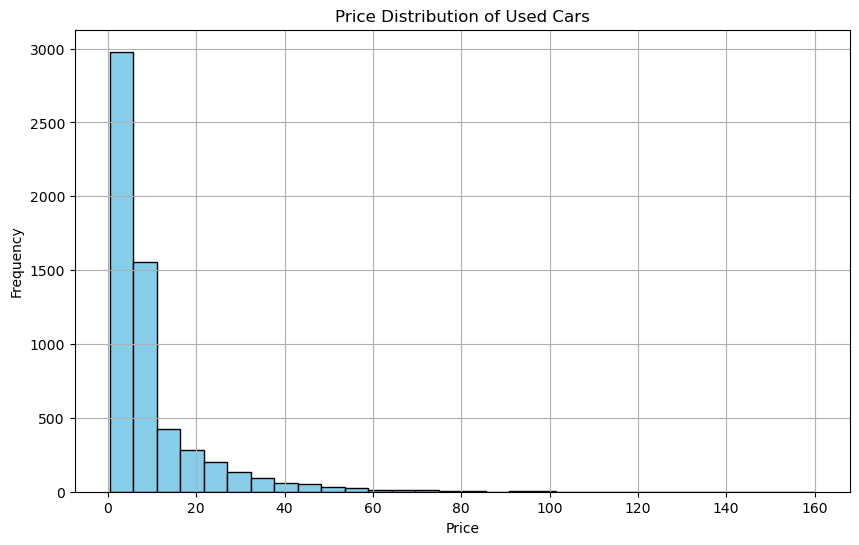

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price(INR)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Used Cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


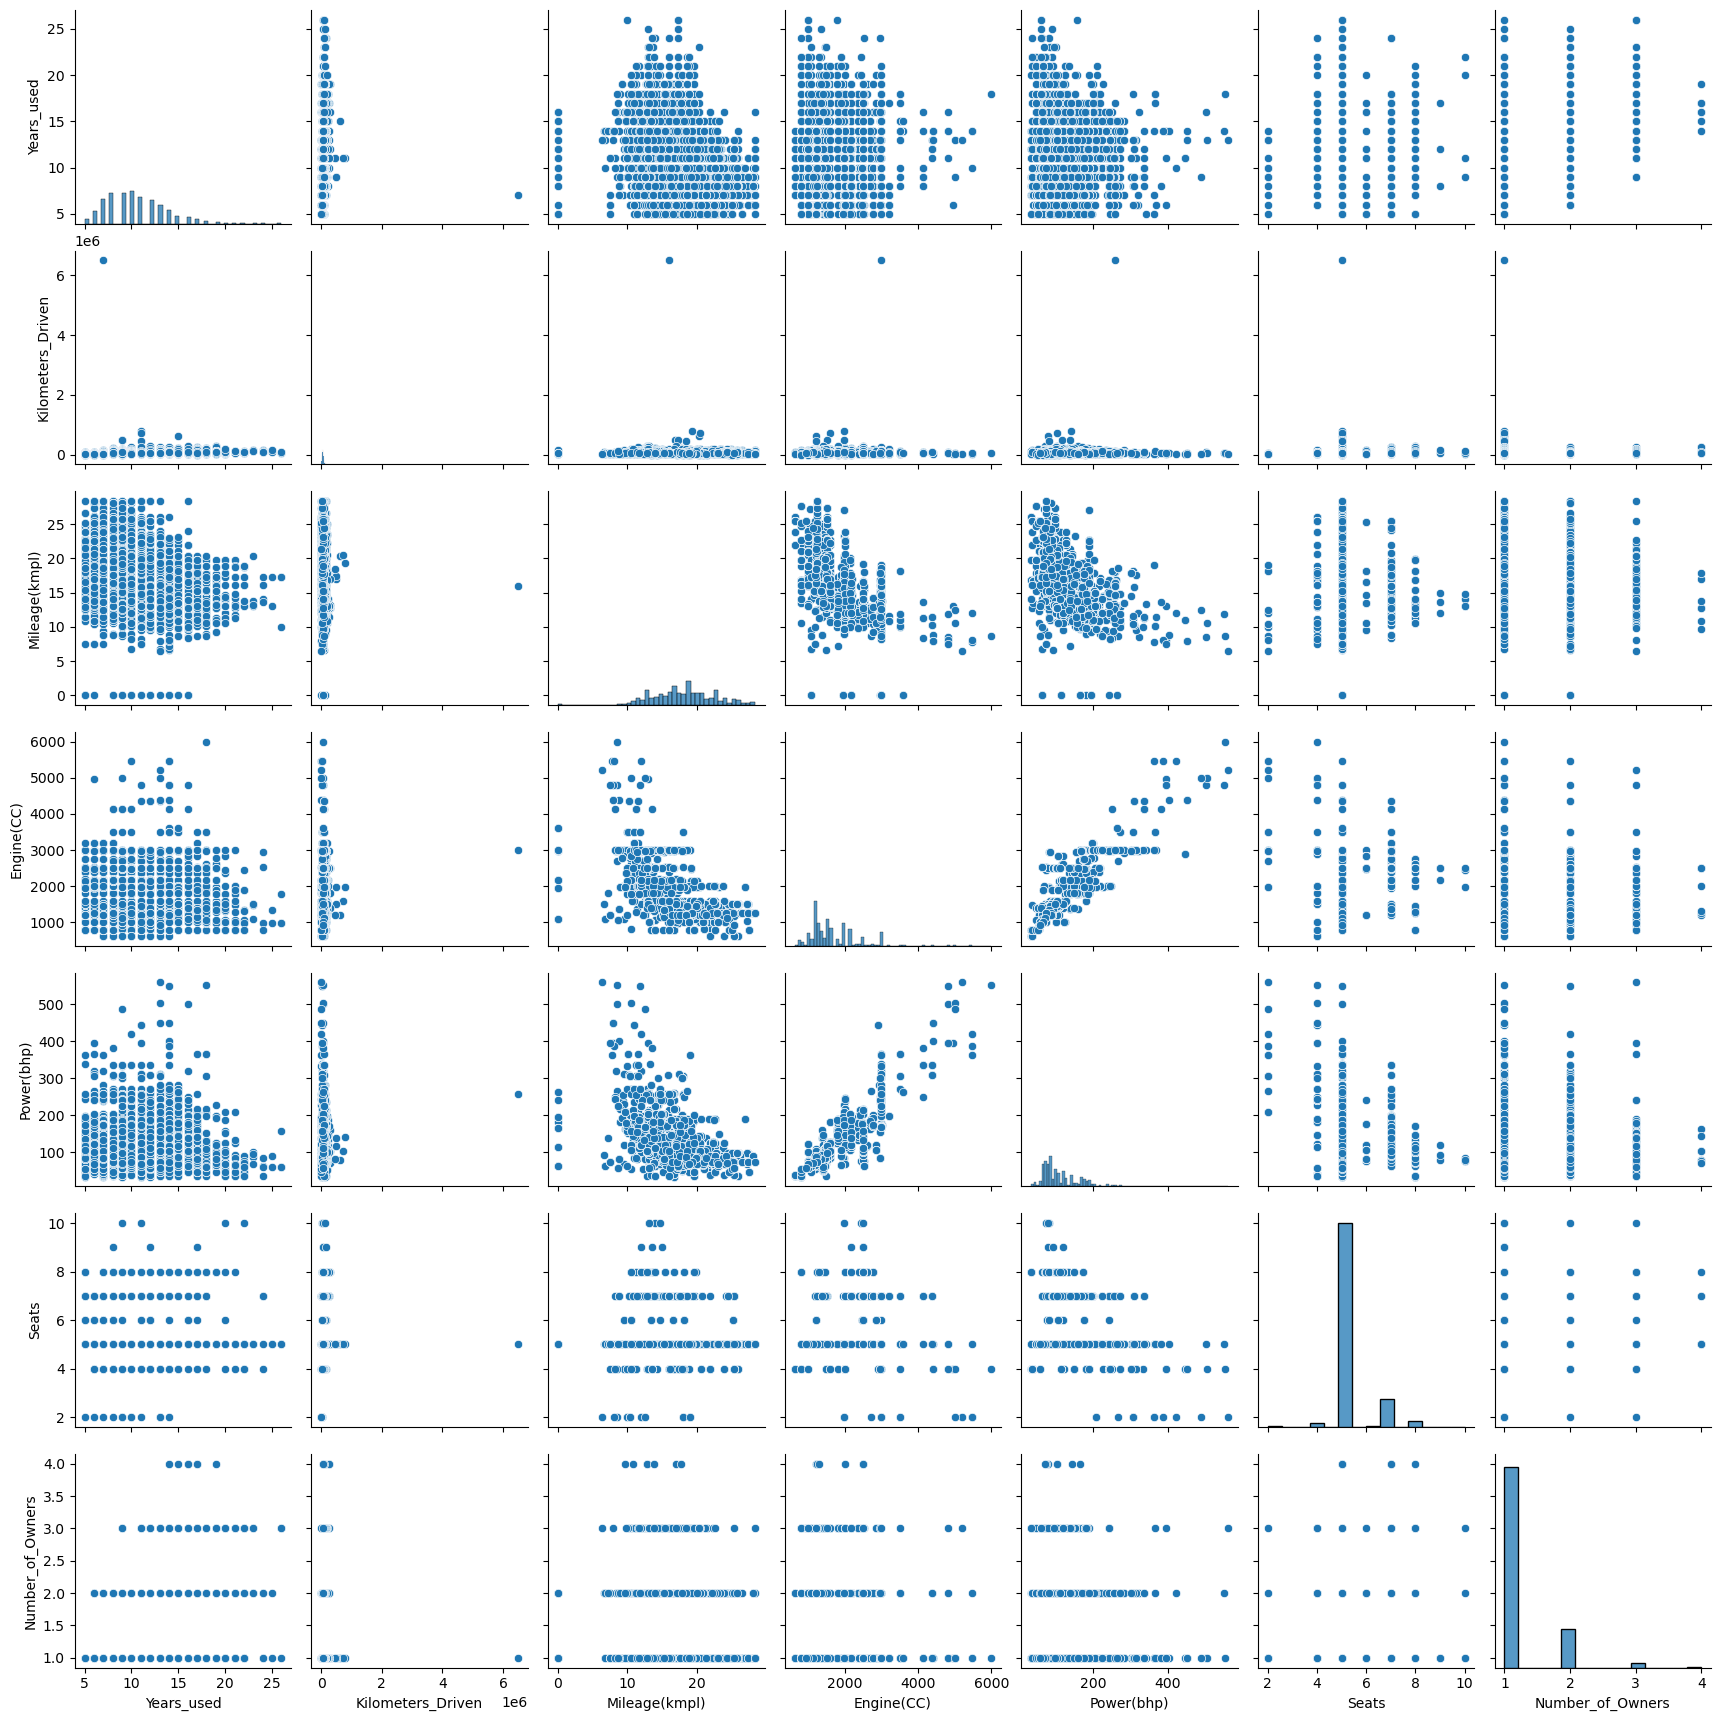

In [34]:

variables_of_interest = ['Years_used', 'Kilometers_Driven', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Seats' , 'Number_of_Owners']

# Create a pair plot
sns.pairplot(df[variables_of_interest])
plt.show()


In [35]:
#cant conclude anything, no correlation between variables

C:\Users\PC\AppData\Local\Temp\ipykernel_9256\2431051975.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Fuel_Type', y='Price(INR)', data=df, ci=None)  # ci=None removes error bars (confidence intervals)


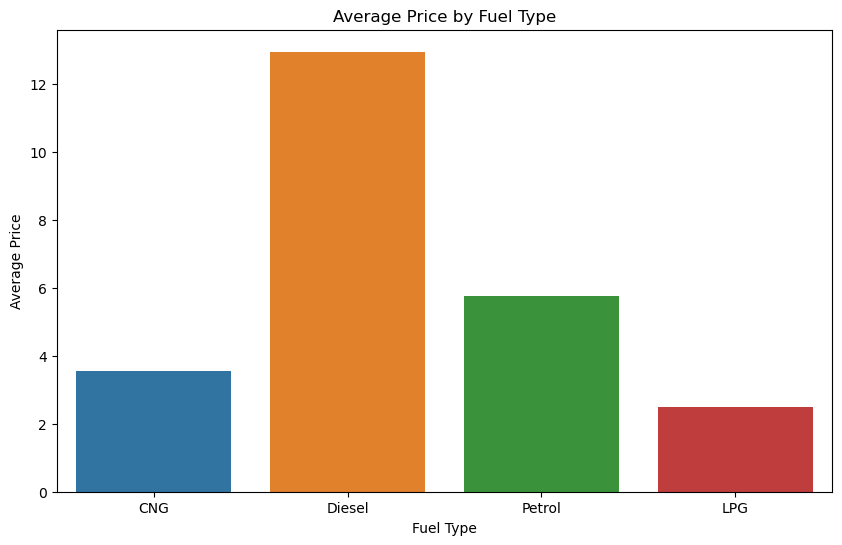

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Type', y='Price(INR)', data=df, ci=None)  # ci=None removes error bars (confidence intervals)

plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Price by Fuel Type')
plt.show()

In [37]:
#Diesel cars are relatively expensive compared to petrol and CNG while LPG powered cars are the cheapest

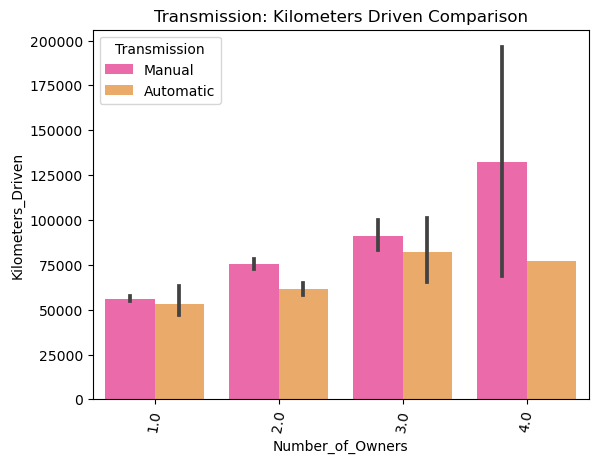

In [38]:
sns.barplot(x="Number_of_Owners", y="Kilometers_Driven", hue="Transmission", data=df, palette="spring")

# Rotate x-axis labels for better readability
plt.xticks(rotation=80)

# Add title
plt.title("Transmission: Kilometers Driven Comparison")

# Show plot
plt.show()

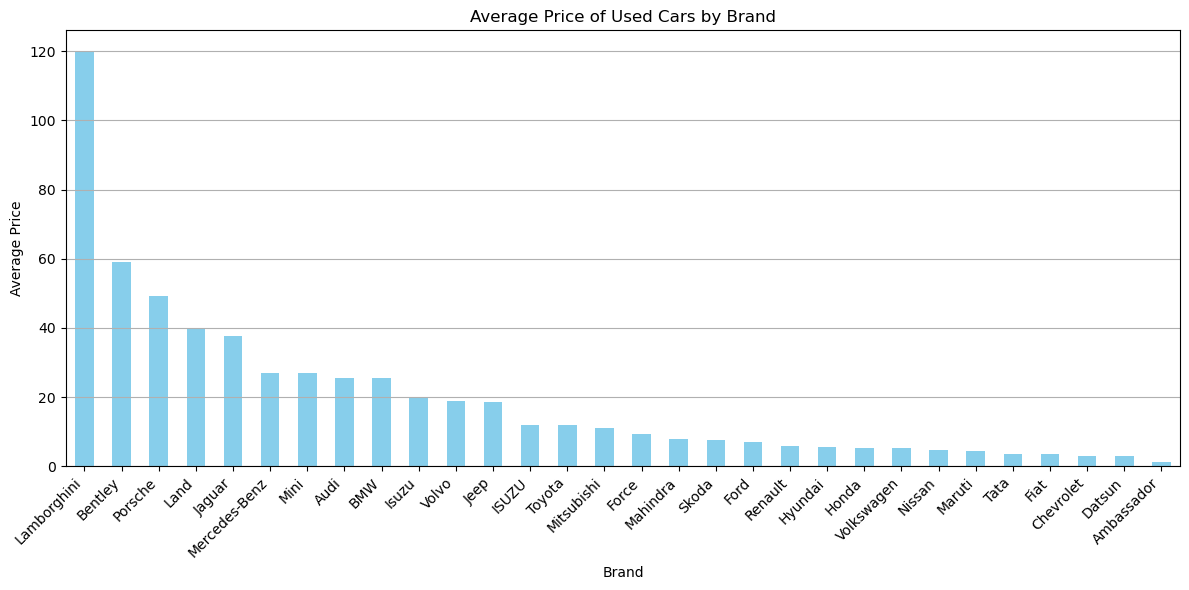

In [39]:
brand_price_mean = df.groupby('Brand')['Price(INR)'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
brand_price_mean.plot(kind='bar', color='skyblue')
plt.title('Average Price of Used Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show gridlines only on the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

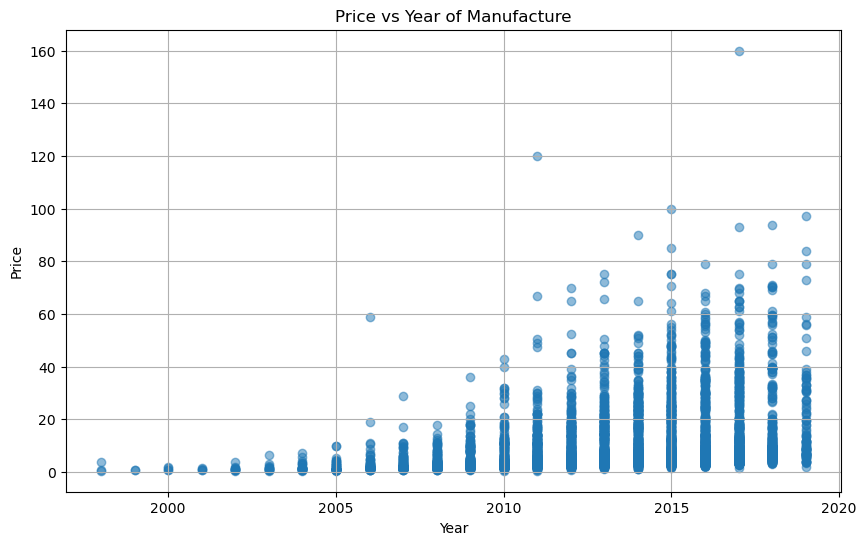

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price(INR)'], alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year of Manufacture')

plt.grid(True)
plt.show()

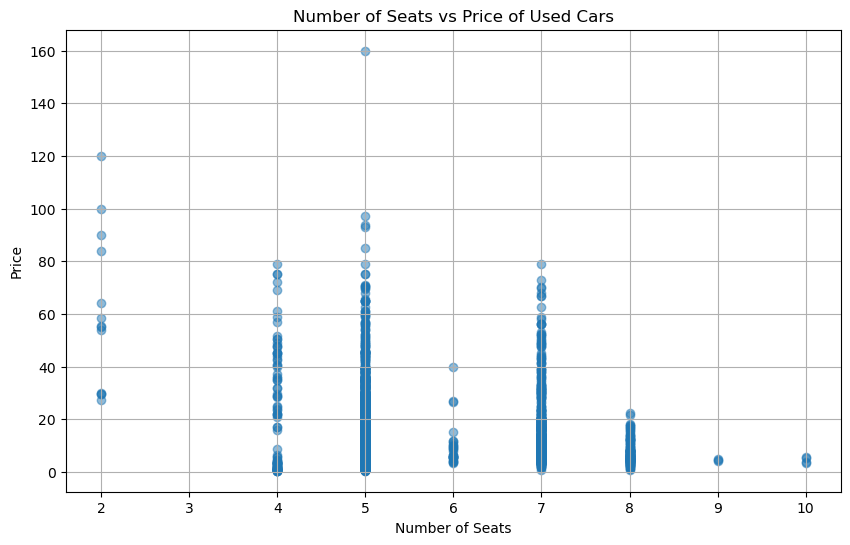

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Seats'], df['Price(INR)'], alpha=0.5)
plt.title('Number of Seats vs Price of Used Cars')
plt.xlabel('Number of Seats')
plt.ylabel('Price')
plt.grid(True)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_9256\3804615228.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Transmission', y='Price(INR)', data=df, ci=None)


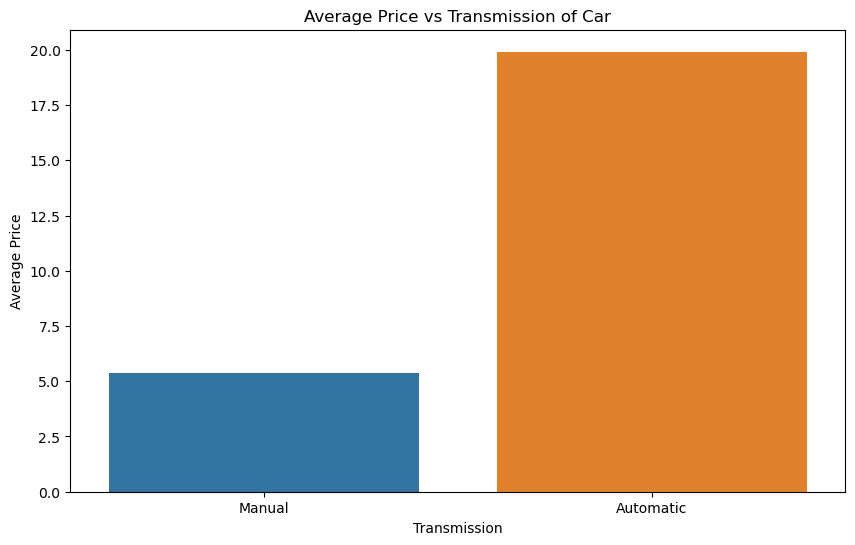

In [42]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Transmission', y='Price(INR)', data=df, ci=None)

plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.title('Average Price vs Transmission of Car')

plt.show()


In [43]:
#Manual cars are cheaper compared to automatic cars

In [44]:
fig = go.Figure(data=[go.Pie(labels=df['Fuel_Type'], values=df['Price(INR)'], hole=.3)])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

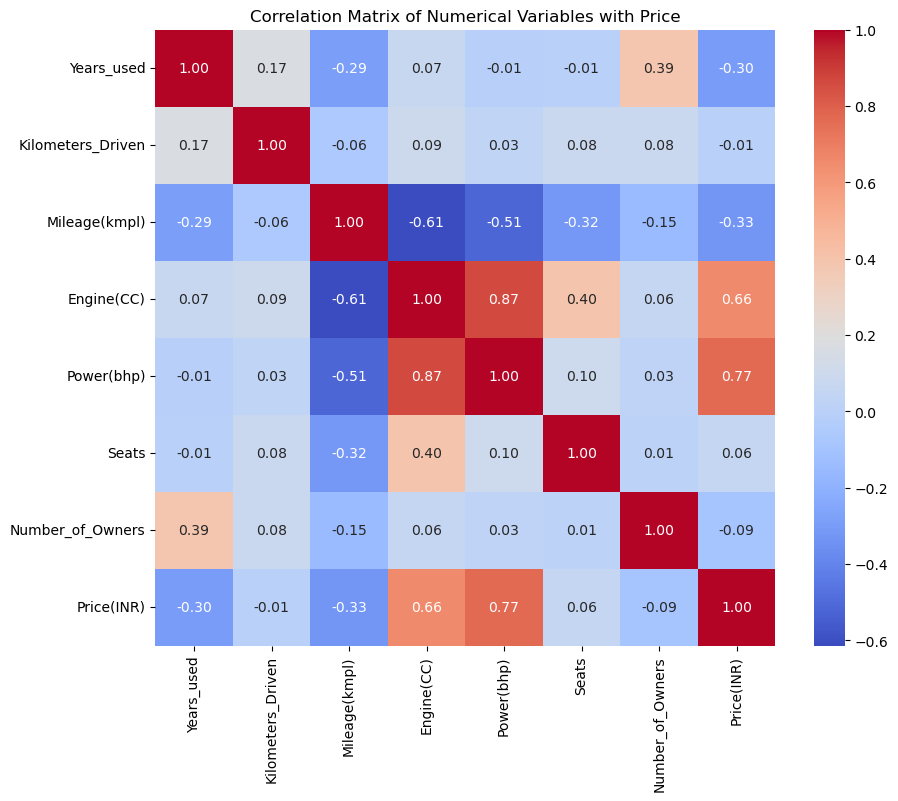

In [45]:
#Numerical variables = Km Driven, Mileage, Power, Engine , No. of Seats, Number of Owners
#Categorical variables = Fuel type, Year , Location
#Target variable = Price

numerical_vars = ['Years_used', 'Kilometers_Driven', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Seats' , 'Number_of_Owners' ]

# Compute the correlation matrix
corr_matrix = df[numerical_vars + ['Price(INR)']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables with Price')
plt.show()

In [46]:
#Power and Engine have a strong direct correlation with price while years used and mileage have a slight negative correlation. Seats, km driven and number of owners do not impacr price that much

Model Evaluation

In [47]:

# and 'price' is the target variable we want to predict
X = df[['Years_used', 'Kilometers_Driven', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Seats' , 'Number_of_Owners' ]]
y = df['Price(INR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Optionally, you can also print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 35.8128289645041
R^2 Score: 0.6586360380356062
Coefficients: [-1.11595976e+00  2.21366018e-06 -8.36155683e-02  2.54162174e-03
  1.35195733e-01 -1.14495250e+00  1.04233526e-02]
Intercept: 9.362411142054361


Coefficient for 'Mileage': -0.0473
Coefficient for 'Years used': -1.0599
Coefficient for 'Engine': 0.0008
Coefficient for 'Power': 0.000806
Coefficient for 'Number of owners':  0.1520

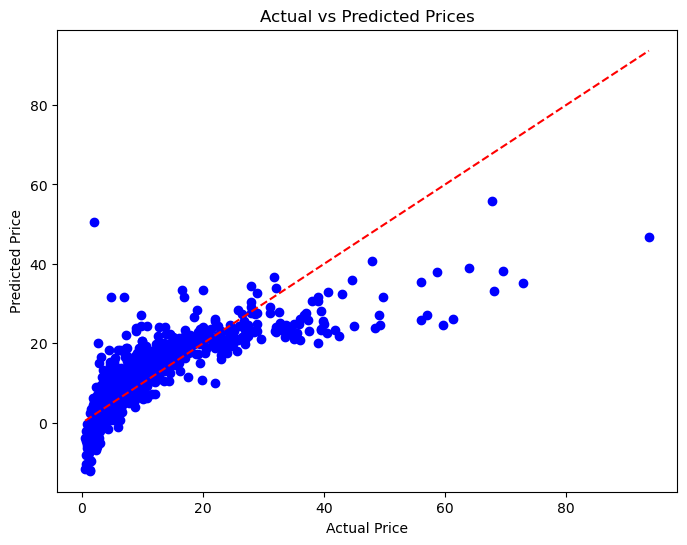

In [48]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()



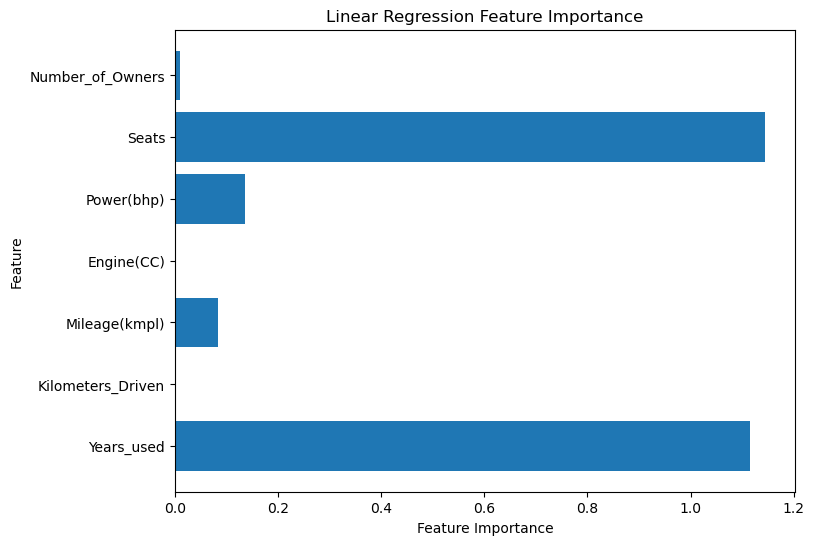

In [49]:
feature_names = ['Years_used', 'Kilometers_Driven', 'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Seats' , 'Number_of_Owners' ]
coefficients = model.coef_

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_names, abs(coefficients))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Linear Regression Feature Importance')
plt.show()

In [50]:
#KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
k = 5  # Choose the number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 16.913523942127664
R^2 Score: 0.8387821428631929


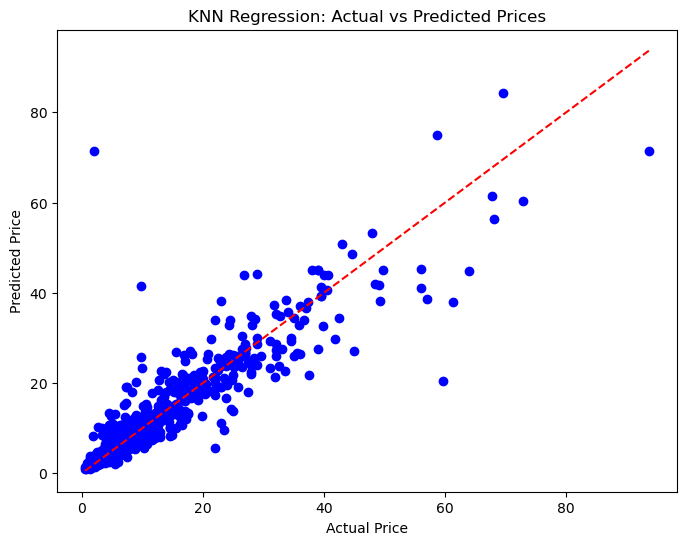

In [51]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regression: Actual vs Predicted Prices')
plt.show()


In [52]:
#Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 14.229619419117272
R^2 Score: 0.8643648267225736


In [53]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # 'reg:squarederror' for regression
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 18.71680889909366
R^2 Score: 0.821593428224904


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 23.4230342763396
R^2 Score: 0.7767342035524727


In [55]:
results = {
    'Linear Regression': 0.65,
    'Support Vector Machine': 0.77,
    'Random Forest': 0.86,
    'KNN': 0.83,
    'XGBoost': 0.82
}


df_results = pd.DataFrame.from_dict(results, orient='index', columns=['R2 Score'])

# Sort the DataFrame by R2 score (optional)
df_results = df_results.sort_values(by='R2 Score', ascending=False)

# Print the DataFrame
print(df_results)


                        R2 Score
Random Forest               0.86
KNN                         0.83
XGBoost                     0.82
Support Vector Machine      0.77
Linear Regression           0.65


Random forest performed best


In [56]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 14.229619419117272
R-squared (R2) Score: 0.8643648267225736


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'model' is your trained Random Forest regression model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 1.64064934893617
Mean Squared Error (MSE): 14.229619419117272
Root Mean Squared Error (RMSE): 3.7722167778532123
R-squared (R2) Score: 0.8643648267225736


In [58]:
#Additional Metrics
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared (Adj R2):", adj_r2)

Mean Absolute Error (MAE): 1.64064934893617
Root Mean Squared Error (RMSE): 3.7722167778532123
Adjusted R-squared (Adj R2): 0.8635512481339345


Feature ranking:
1. feature Power(bhp) (0.681575)
2. feature Years_used (0.162461)
3. feature Kilometers_Driven (0.061189)
4. feature Engine(CC) (0.045024)
5. feature Mileage(kmpl) (0.036043)
6. feature Seats (0.010943)
7. feature Number_of_Owners (0.002765)


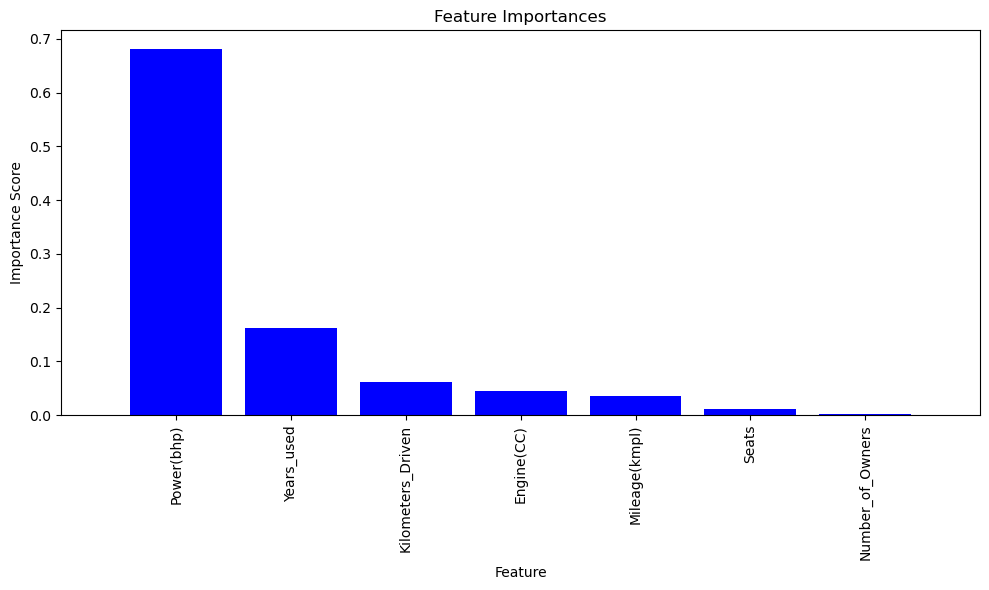

In [59]:
# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances and names in descending order
indices = np.argsort(importances)[::-1]
importances_sorted = importances[indices]
feature_names_sorted = feature_names[indices]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names_sorted[f], importances_sorted[f]))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances_sorted, color="b", align="center")
plt.xticks(range(X.shape[1]), feature_names_sorted, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [60]:
!pip install --upgrade joblib sklearn

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [61]:
#import pickle

# Assuming 'model' is your trained machine learning model
# Save the trained model to a file with the correct data types and structure
#with open('model.pkl', 'wb') as f:
    #pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)


In [62]:
!pip install joblib





[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import joblib

model_path = "compressed.model.joblib"

# Save the model with compression
joblib.dump(model, model_path, compress=('zlib', 3))  # Use zlib compression with level 3

print("Compressed model saved to:", model_path)

Compressed model saved to: compressed.model.joblib
